In [4]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Dictionary of patterns and responses
patterns = {
    r'(?i)({}).*'.format('|'.join(list_syn['hello'])): "How can I help you?",
    r'(?i)analyze.*': "{}".format(lower_case_response),
}

def generate_response(user_input):
    for pattern, responses in patterns.items():
        match = re.match(pattern, user_input)
        if match:
            response = responses
            return response
    return "I'm sorry, but I'm not sure I understand."

def test_is_lowercase(user_input_processing):
    lower_case_response = user_input_processing.apply(lambda x: str(x).lower())
    return lower_case_response


def chat():
    print("Hi")
    while True:
        user_input = input("You: ")

        if user_input.lower() == 'analyze':
            user_input_processing = user_input
            lower_case_response = test_is_lowercase(user_input_processing)
            print(lower_case_response)

        if user_input.lower() == 'quit':
            print("Goodbye!")
            break
        response = generate_response(user_input)
        print("Mr. C-Bot:", response)

# Example usage
chat()

In [5]:
#import csv

In [5]:
#data = pd.read_csv("/content/drive/MyDrive/Th_köln/NLP_Course/codes/IMDB Dataset.csv")

In [13]:
import tensorflow_datasets as tfds

# Load the IMDb movie reviews dataset
dataset = tfds.load('imdb_reviews', split='train')

# Convert the dataset to a pandas DataFrame
reviews = []
labels = []
for example in dataset:
    reviews.append(example['text'].numpy().decode('utf-8'))
    labels.append(example['label'].numpy())

df = pd.DataFrame({'review': reviews, 'label': labels})

# Print the first few rows of the DataFrame
print(df.head())



***************************************************************
Failed to import TensorFlow. Please note that TensorFlow is not installed by default when you install TFDS. This allows you to choose to install either `tf-nightly` or `tensorflow`. Please install the most recent version of TensorFlow, by following instructions at https://tensorflow.org/install.
***************************************************************




ModuleNotFoundError: No module named 'tensorflow'

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
data.sample(19)

,review,sentiment
2325,With title like this you know you get pretty m...,negative
1964,"This production was made in the middle 1980s, ...",positive
45732,This is one of the worst movie I have ever see...,negative
40727,"Greetings All,<br /><br />Isn't it amazing the...",negative
48918,"I love comedies and I love independent films, ...",negative
47417,Martin Ritt seems to be a director who was alw...,positive
37609,Dick Tracy is easily the best comic book based...,positive
41976,Jude Law gives his all in this beautifully fil...,negative
11047,This movie looked as if it might be good at th...,negative
16123,I am writing this review having watched it sev...,negative


In [8]:
data.shape

(50000, 2)

In [9]:
data.iloc[1]

review       A wonderful little production. <br /><br />The...
sentiment                                             positive
Name: 1, dtype: object

In [10]:
data.iloc[1,0]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [11]:
data.iloc[1][1]

'positive'

#The pre-processing tasks we perform


*   Converting the text to lowercase
*   Removing Emails
*   Removing HTML Tags
*   Removing Stop Words
*   Lemmatization





In [12]:
# Converting the text to lowercase
data['review'] = data['review'].apply(lambda x: str(x).lower())

In [13]:
data['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [14]:
#Removing Emails
def remove_emails(x):
    email_pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)")
    return re.sub(email_pattern, '', x)

In [15]:
data['review'] = data['review'].apply(remove_emails)

In [16]:
data['review'][1]

'a wonderful little production. <br /><br />the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. <br /><br />the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well d

In [17]:
#Removing HTML Tags

def remove_html_tags(x):

    content = BeautifulSoup(x, 'lxml').get_text().strip()

    return content

In [18]:
data['review'] = data['review'].apply(remove_html_tags)

<ipython-input-17-e1701225e0bc>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  content = BeautifulSoup(x, 'lxml').get_text().strip()


In [19]:
data['review'][1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [20]:
#Removing Stop Words
def remove_stop_words(x):
    stop_words = set(stopwords.words("english"))
    return ' '.join([word for word in x.split() if word not in stop_words])

In [21]:
data['review'] = data['review'].apply(remove_stop_words)

In [22]:
data['review'][1]

'wonderful little production. filming technique unassuming- old-time-bbc fashion gives comforting, sometimes discomforting, sense realism entire piece. actors extremely well chosen- michael sheen "has got polari" voices pat too! truly see seamless editing guided references williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great master\'s comedy life. realism really comes home little things: fantasy guard which, rather use traditional \'dream\' techniques remains solid disappears. plays knowledge senses, particularly scenes concerning orton halliwell sets (particularly flat halliwell\'s murals decorating every surface) terribly well done.'

In [28]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemma(x):
    content = ' '.join([lemmatizer.lemmatize(word) for word in x.split(" ")])
    return content

In [29]:
data['review'] = data['review'].apply(lemma)

In [30]:
data['review'][1]

'wonderful little production. filming technique unassuming- old-time-bbc fashion give comforting, sometimes discomforting, sense realism entire piece. actor extremely well chosen- michael sheen "has got polari" voice pat too! truly see seamless editing guided reference williams\' diary entries, well worth watching terrificly written performed piece. masterful production one great master\'s comedy life. realism really come home little things: fantasy guard which, rather use traditional \'dream\' technique remains solid disappears. play knowledge senses, particularly scene concerning orton halliwell set (particularly flat halliwell\'s mural decorating every surface) terribly well done.'

#**Assignment**

Can there be a difference in change the order of performing lemmatization and stopword removal?


In [31]:
X = data['review']
y = data['sentiment']

In [ ]:
#Converting the Data into Vector using tfidf
'''
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)'''

'\ntfidf = TfidfVectorizer()\nX = tfidf.fit_transform(X)'

In [32]:
#Converting the Data into Vector using bag-of-words
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [34]:
classifier = LogisticRegression()
classifier.fit(vectorizer.transform(X_train), y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
y_test_pred = classifier.predict(vectorizer.transform(X_test))

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4977
    positive       0.88      0.89      0.88      5023

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [37]:
confusion_matrix(y_test, y_test_pred)

array([[4347,  630],
       [ 543, 4480]])

In [38]:

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

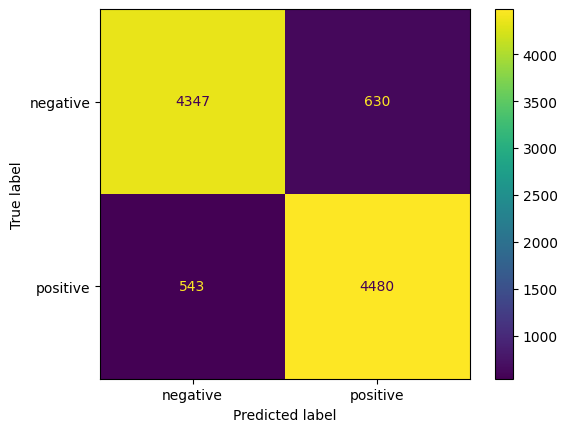

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

Positive Words


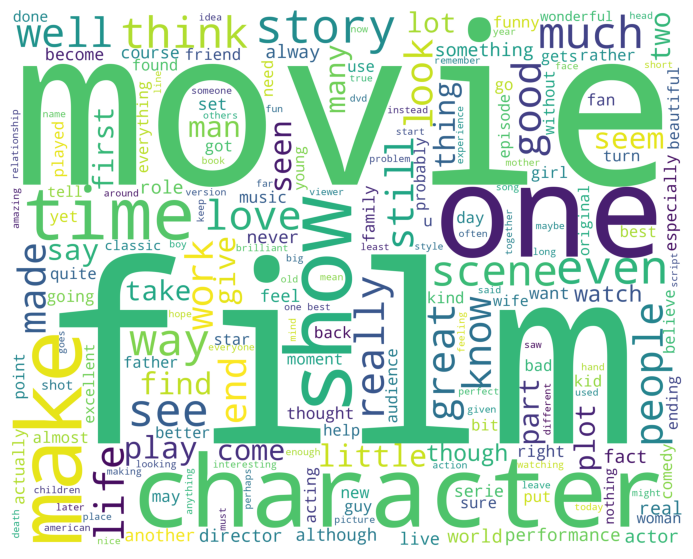

Negative Words


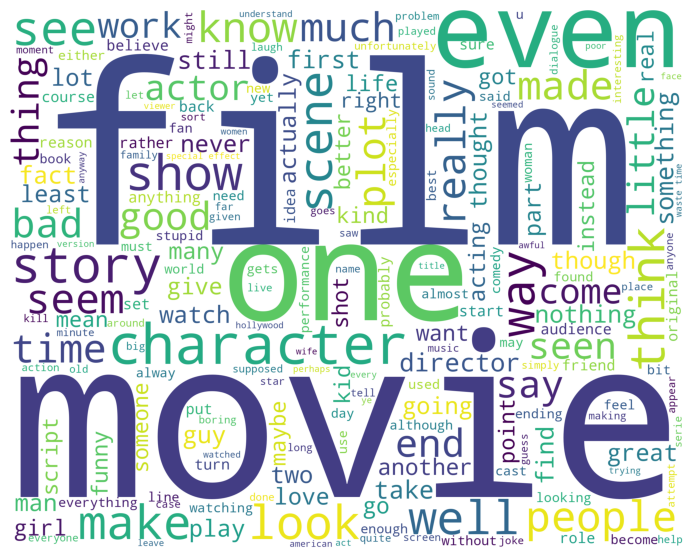

In [ ]:
from wordcloud import WordCloud
positivedata = data[data['sentiment'] == "positive"]
positivedata =positivedata['review']
negdata = data[data['sentiment'] == "negative"]
negdata= negdata['review']
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    wordcloud = WordCloud(
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(words)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive Words")
wordcloud_draw(positivedata)
print("Negative Words")
wordcloud_draw(negdata)

[Visualize features](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/linear_explainer/Sentiment%20Analysis%20with%20Logistic%20Regression.html#Load-the-IMDB-dataset)